In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 文件路径
PRICE_PATH = '../data/turtle_0710_price.csv'
BACKTEST_PATH = '../data/tutle_0710_backtest.xls'

**回测结果有以下的sheet:** 
- 收益统计
- 交易统计
- 收益曲线
- 年度收益统计
- 月度收益统计
- 年度最大回撤统计
- 每日持仓
- 持仓详单
- 交易记录


In [3]:
df_price = pd.read_csv(PRICE_PATH)
df_price['time'] = pd.to_datetime(df_price['time'])

In [18]:
df_rev = pd.read_excel(BACKTEST_PATH, sheet_name='收益曲线')
df_rev['日期'] = df_rev['日期'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
df_rev.head()

,日期,商品CFCI累计收益率,策略累计收益率,商品CFCI每日收益率,策略每日收益率
0,2018-01-02,0.010093,0.0,0.010093,0.0
1,2018-01-03,0.007368,0.0,-0.002697,0.0
2,2018-01-04,0.010960,0.0,0.003565,0.0
3,2018-01-05,0.009474,0.0,-0.001470,0.0
4,2018-01-08,0.010960,0.0,0.001472,0.0


In [34]:
df_trade = pd.read_excel(BACKTEST_PATH, sheet_name='交易记录')
df_trade['日期'] = df_trade['日期'].apply(lambda x: datetime.datetime.strptime(str(x), '%Y%m%d'))
df_trade.index = df_trade['日期'].values
df_trade.head()

,交易日,日期,时间,标的代码,标的名称,方向,下单类型,委托价,成交价,成交量,成交额,平仓赢亏,手续费
2018-01-24,20180124,2018-01-24,15:00:00,cu1803,铜1803,卖开,限价,52730,52730,2,527300,0,26.365
2018-02-06,20180206,2018-02-06,15:00:00,cu1803,铜1803,买平,限价,52930,52930,2,529300,-2000,26.465
2018-02-08,20180208,2018-02-08,15:00:00,cu1804,铜1804,卖开,限价,52120,52120,2,521200,0,26.060
2018-02-09,20180209,2018-02-09,15:00:00,cu1804,铜1804,卖开,限价,51560,51560,2,515600,0,25.780
2018-02-12,20180212,2018-02-12,15:00:00,cu1804,铜1804,卖开,限价,51710,51710,2,517100,0,25.855


In [36]:
df_trade.loc['2018-07': '2018-08']

,交易日,日期,时间,标的代码,标的名称,方向,下单类型,委托价,成交价,成交量,成交额,平仓赢亏,手续费
2018-07-04,20180704,2018-07-04,15:00:00,cu1808,铜1808,卖平,限价,50100,50100,18,4509000,-334800,225.4500
2018-07-04,20180704,2018-07-04,15:00:00,cu1808,铜1808,卖开,限价,50100,50100,1,250500,0,12.5250
2018-07-05,20180705,2018-07-05,15:00:00,cu1808,铜1808,卖开,限价,49330,49330,1,246650,0,12.3325
2018-07-06,20180706,2018-07-06,15:00:00,cu1808,铜1808,买平,限价,49160,49160,2,491600,5550,24.5800
2018-07-06,20180706,2018-07-06,15:00:00,cu1809,铜1809,卖开,限价,49160,49160,1,245800,0,12.2900
2018-07-11,20180711,2018-07-11,15:00:00,cu1809,铜1809,卖开,限价,48120,48120,1,240600,0,12.0300
2018-07-13,20180713,2018-07-13,15:00:00,cu1809,铜1809,卖开,限价,48720,48720,1,243600,0,12.1800
2018-07-16,20180716,2018-07-16,15:00:00,cu1809,铜1809,卖开,限价,48720,48720,1,243600,0,12.1800
2018-07-18,20180718,2018-07-18,15:00:00,cu1809,铜1809,卖开,限价,48260,48260,1,241300,0,12.0650
2018-07-19,20180719,2018-07-19,15:00:00,cu1809,铜1809,卖开,限价,48670,48670,1,243350,0,12.1675


## 价格 vs. 收益曲线

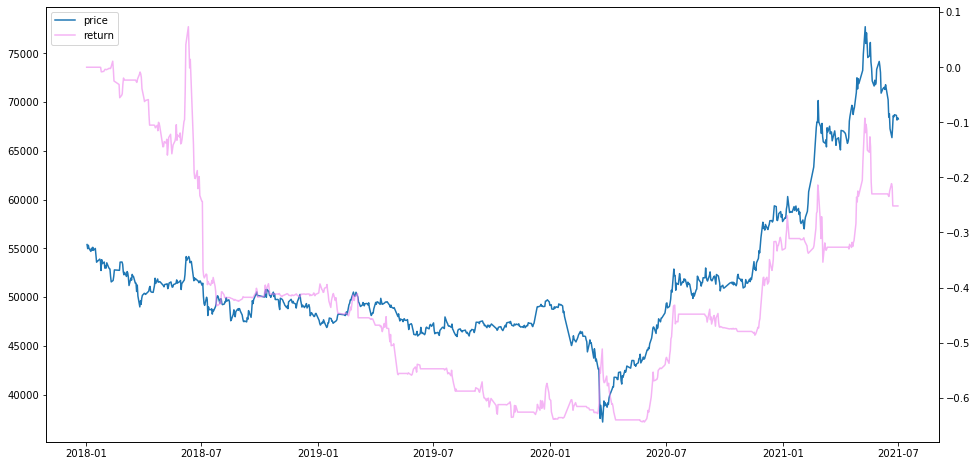

In [29]:
_, ax = plt.subplots(figsize=(16, 8))
l1 = ax.plot(df_price.set_index('time')['price'], label='price')

ax2 = ax.twinx()
l2 = ax2.plot(df_rev.set_index('日期')['策略累计收益率'], color='violet', alpha=0.6, label='return')

lines = l1 + l2
ax.legend(lines, [l.get_label() for l in lines])

## 价格 vs. 收益曲线

In [ ]:
_, ax = plt.subplots(figsize=(16, 8))
l1 = ax.plot(df_price.set_index('time')['price'], label='price')

ax2 = ax.twinx()
l2 = ax2.plot(df_rev.set_index('日期')['策略累计收益率'], color='violet', alpha=0.6, label='return')

lines = l1 + l2
ax.legend(lines, [l.get_label() for l in lines])